In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer el archivo Excel y cargar el DataFrame
df = pd.read_excel("C:/Users/lenovo/Desktop/Politecnico/2° Año/1° Cuatrimmestre/Aprendizaje Automático/Proyecto Machie Learning/dimension-entorno-limpio.xlsx")
print("Total de datos :", len(df))
df.head()

Total de datos : 3538


,tipo,partido,radio10,sup_ha,pobl_tot,dens_ha,ind_trpu,ind_inunda,ind_evp,ind_cavas,...,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279
0,URBANO,Almirante Brown,60283615,34.20,1816,53.10,0.86,1.0,0.444114,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,URBANO,Almirante Brown,60282701,18.62,658,35.34,0.99,1.0,1.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,URBANO,Almirante Brown,60283307,28.45,1499,52.69,1.00,1.0,0.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,URBANO,Almirante Brown,60282307,15.78,916,58.05,1.00,1.0,0.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,URBANO,Almirante Brown,60282603,24.27,919,37.87,0.96,1.0,1.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Seleccionar las columnas relevantes
columnas_relevantes = ['cat_ent', 'ind_trpu', 'ind_inunda', 'ind_evp', 'ind_cavas', 'ind_indus']
datos = df[columnas_relevantes]
print(datos.head())

  cat_ent  ind_trpu  ind_inunda   ind_evp  ind_cavas  ind_indus
0    ALTO      0.86         1.0  0.444114        1.0       0.98
1   MEDIO      0.99         1.0  1.000000        1.0       0.20
2    ALTO      1.00         1.0  0.000000        1.0       1.00
3   MEDIO      1.00         1.0  0.000000        1.0       0.54
4   MEDIO      0.96         1.0  1.000000        1.0       0.13


In [5]:
# Separar las características y la variable objetivo
X = datos[['ind_trpu', 'ind_inunda', 'ind_evp', 'ind_cavas', 'ind_indus']]
y = datos['cat_ent']

In [6]:
# Mostrar distribución original de las categorías
print("Distribución original de las categorías:")
print(y.value_counts())

Distribución original de las categorías:
cat_ent
MEDIO       1479
ALTO        1179
BAJO         490
MUY ALTO     304
MUY BAJO      86
Name: count, dtype: int64


In [7]:
# Usar sobremuestreo para balancear las categorías
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [8]:
# Crear un nuevo DataFrame con los datos balanceados
datos_balanceados = pd.DataFrame(X_res, columns=['ind_trpu', 'ind_inunda', 'ind_evp', 'ind_cavas', 'ind_indus'])
datos_balanceados['cat_ent'] = y_res

In [9]:
# Mostrar distribución balanceada de las categorías
print("\nDistribución balanceada de las categorías:")
print(datos_balanceados['cat_ent'].value_counts())


Distribución balanceada de las categorías:
cat_ent
ALTO        1479
MEDIO       1479
MUY ALTO    1479
BAJO        1479
MUY BAJO    1479
Name: count, dtype: int64


In [10]:
# Buscar datos faltantes en el DataFrame 'datos_balanceados'
datos_faltantes_por_columna = datos_balanceados.isnull().sum()
datos_faltantes_totales = datos_balanceados.isnull().sum().sum()

In [11]:
# Mostrar los resultados
print("Datos faltantes por columna:")
print(datos_faltantes_por_columna)
print("\nTotal de datos faltantes:", datos_faltantes_totales)

Datos faltantes por columna:
ind_trpu      0
ind_inunda    0
ind_evp       0
ind_cavas     0
ind_indus     0
cat_ent       0
dtype: int64

Total de datos faltantes: 0


In [12]:
# Normalizar los datos
scaler = StandardScaler()
datos_numericos = datos_balanceados.select_dtypes(include=['float64', 'int64'])
datos_normalizados = scaler.fit_transform(datos_numericos)
datos_normalizados = pd.DataFrame(datos_normalizados, columns=datos_numericos.columns)

In [13]:
# Dividir los datos normalizados en conjuntos de entrenamiento y prueba
X = datos_normalizados[['ind_trpu', 'ind_inunda', 'ind_evp', 'ind_cavas', 'ind_indus']]
y = datos_balanceados['cat_ent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Entrenamiento del modelo
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_test = modelo.predict(X_test)

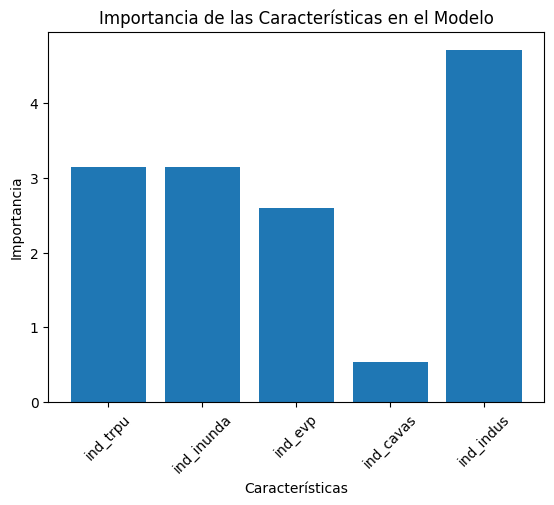

In [35]:
# Visualización de la importancia de las características en el modelo
plt.figure()
plt.bar(X.columns, modelo.coef_[0])
plt.title('Importancia de las Características en el Modelo')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Mostrar las predicciones junto con la precisión de cada predicción
resultados = pd.DataFrame({'Dato de Prueba': y_test, 'Dato Predecido': y_pred_test})
resultados['Presicion'] = resultados['Dato de Prueba'] == resultados['Dato Predecido']
print("Resultados del conjunto de prueba:")
print(resultados)

Resultados del conjunto de prueba:
     Dato de Prueba Dato Predecido  Presicion
2759           ALTO           ALTO       True
2846          MEDIO          MEDIO       True
6681       MUY BAJO       MUY BAJO       True
3262           ALTO           ALTO       True
486            ALTO           ALTO       True
...             ...            ...        ...
7391       MUY BAJO       MUY BAJO       True
6302       MUY BAJO       MUY BAJO       True
110           MEDIO           ALTO      False
51             BAJO           BAJO       True
1109          MEDIO           BAJO      False

[1479 rows x 3 columns]


In [37]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)
print("\nAccuracy en el conjunto de prueba:", accuracy)
print("Classification Report en el conjunto de prueba:\n", classification_rep)


Accuracy en el conjunto de prueba: 0.8755916159567275
Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

        ALTO       0.82      0.80      0.81       289
        BAJO       0.92      0.86      0.89       334
       MEDIO       0.82      0.81      0.81       283
    MUY ALTO       0.89      0.90      0.90       279
    MUY BAJO       0.92      1.00      0.96       294

    accuracy                           0.88      1479
   macro avg       0.87      0.88      0.87      1479
weighted avg       0.88      0.88      0.87      1479

